## Spam Filtering

## Loading the data set

In [9]:
import pandas as pd


X2_train = pd.read_csv('X1_train.csv',sep=',',header=None,engine='python',error_bad_lines=False)
y2_train = pd.read_csv('y1_train.csv',sep=',',header=None,engine='python',error_bad_lines=False)
X2_test = pd.read_csv('X1_test.csv',sep=',',header=None,engine='python',error_bad_lines=False)
y2_test = pd.read_csv('y1_test.csv',sep=',',header=None,engine='python',error_bad_lines=False)
X2_val = pd.read_csv('X1_val.csv',sep=',',header=None,engine='python',error_bad_lines=False)
y2_val = pd.read_csv('y1_val.csv',sep=',',header=None,engine='python',error_bad_lines=False)

C:\Users\Winston\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## 1. Data Pre-Processing Step

In [10]:

X2_val.head()

,0,1
0,tweet_index,tweet
1,2049781431,@Koppite4004 I always get over-excited when th...
2,2186813755,Working on tonight's post
3,2251415926,Gonna try n fall back 2 sleep! Dream of my &qu...
4,2247456751,@danishmarie I remember watching him since ......


In [11]:
from nltk.tokenize import word_tokenize
X2_train['tokenized'] = X2_train[1].apply(lambda x: word_tokenize(x))
X2_val['tokenized'] = X2_val[1].apply(lambda x: word_tokenize(x))
X2_test['tokenized'] = X2_test[1].apply(lambda x: word_tokenize(x))

X2_train.to_csv('X2_train_tokenized.cvs')
X2_val.to_csv('X2_val_tokenized.cvs')
X2_test.to_csv('X2_test_tokenized.cvs')

In [12]:
from nltk.corpus import stopwords
X2_train['filtered_words'] = X2_train['tokenized'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
X2_val['filtered_words'] = X2_val['tokenized'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
X2_test['filtered_words'] = X2_test['tokenized'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

X2_train.to_csv('X2_train_filtered_words.cvs')
X2_val.to_csv('X2_val_filtered_words.cvs')
X2_test.to_csv('X2_test_filtered_words.cvs')

In [ ]:
import pandas as pd
X2_train['new_words'] = X2_train['filtered_words'].apply(lambda x: [word for word in x if word.isalnum()])
X2_val['new_words'] = X2_val['filtered_words'].apply(lambda x: [word for word in x if word.isalnum()])
X2_test['new_words'] = X2_test['filtered_words'].apply(lambda x: [word for word in x if word.isalnum()])

X2_train.to_csv('X2_train_new_words.cvs')
X2_val.to_csv('X2_val_new_words.cvs')
X2_test.to_csv('X2_test_new_words.cvs')

In [1]:
import pandas as pd
X2_train = pd.read_csv('X2_train_new_words.cvs',sep=',',header=None,engine='python',error_bad_lines=False)
X2_val = pd.read_csv('X2_val_new_words.cvs',sep=',',header=None,engine='python',error_bad_lines=False)
X2_test = pd.read_csv('X2_test_new_words.cvs',sep=',',header=None,engine='python',error_bad_lines=False)

C:\Users\Winston\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
X2_train.columns = X2_train.iloc[0] 
X2_train = X2_train[1:]


X2_val.columns = X2_val.iloc[0] 
X2_val = X2_val[1:]

X2_test.columns = X2_test.iloc[0] 
X2_test = X2_test[1:]


In [3]:
X2_train.set_axis(['a', 'tweet_index','tweet','tokenized','filtered_words','new_words'], axis=1, inplace=False)
X2_val.set_axis(['a', 'tweet_index','tweet','tokenized','filtered_words','new_words'], axis=1, inplace=False)
X2_test.set_axis(['a', 'tweet_index','tweet','tokenized','filtered_words','new_words'], axis=1, inplace=False)
y2_train = pd.read_csv('y1_train.csv',sep=',',header=None,engine='python',error_bad_lines=False)
y2_test = pd.read_csv('y1_test.csv',sep=',',header=None,engine='python',error_bad_lines=False)
y2_val = pd.read_csv('y1_val.csv',sep=',',header=None,engine='python',error_bad_lines=False)

In [4]:
X2_train.head()

,NaN,0,1,tokenized,filtered_words,new_words
1,0.0,tweet_index,tweet,['tweet'],['tweet'],['tweet']
2,1.0,2048594990,"@mantic59 Cool link, but you got an extra T in...","['@', 'mantic59', 'Cool', 'link', ',', 'but', ...","['@', 'mantic59', 'Cool', 'link', ',', 'got', ...","['mantic59', 'Cool', 'link', 'got', 'extra', '..."
3,2.0,1826490984,@miizluna_jessie tell your mommy i said hiiiii!,"['@', 'miizluna_jessie', 'tell', 'your', 'momm...","['@', 'miizluna_jessie', 'tell', 'mommy', 'sai...","['tell', 'mommy', 'said', 'hiiiii']"
4,3.0,2014223469,Ten o'clock coffee,"['Ten', ""o'clock"", 'coffee']","['Ten', ""o'clock"", 'coffee']","['Ten', 'coffee']"
5,4.0,2068667671,ive had some food now i have the sneezies lol,"['ive', 'had', 'some', 'food', 'now', 'i', 'ha...","['ive', 'food', 'sneezies', 'lol']","['ive', 'food', 'sneezies', 'lol']"


In [5]:
from sklearn.model_selection import train_test_split
train_data = X2_train
rem_data = X2_train.drop(train_data.index).reset_index(drop=True)
val_data = X2_val
test_data = X2_test

# train_data = data_set.sample(frac=0.8, random_state=25).reset_index(drop=True)
# rem_data = data_set.drop(train_data.index).reset_index(drop=True)
# val_data = rem_data.sample(frac=0.5, random_state=25).reset_index(drop=True)
# test_data = rem_data.drop(val_data.index).reset_index(drop=True)

In [6]:
train_data = train_data.drop(['tokenized'], axis = 1)
train_data = train_data.drop(['filtered_words'], axis = 1)
test_data = test_data.drop(['tokenized'], axis = 1)
test_data = test_data.drop(['filtered_words'], axis = 1)
val_data = val_data.drop(['tokenized'], axis = 1)
val_data = val_data.drop(['filtered_words'], axis = 1)

In [7]:
print(train_data.shape)
train_data.head()

(917074, 4)


,NaN,0,1,new_words
1,0.0,tweet_index,tweet,['tweet']
2,1.0,2048594990,"@mantic59 Cool link, but you got an extra T in...","['mantic59', 'Cool', 'link', 'got', 'extra', '..."
3,2.0,1826490984,@miizluna_jessie tell your mommy i said hiiiii!,"['tell', 'mommy', 'said', 'hiiiii']"
4,3.0,2014223469,Ten o'clock coffee,"['Ten', 'coffee']"
5,4.0,2068667671,ive had some food now i have the sneezies lol,"['ive', 'food', 'sneezies', 'lol']"


In [11]:
print(val_data.shape)
val_data.head()

(131012, 4)


,NaN,0,1,new_words
1,0.0,tweet_index,tweet,['tweet']
2,1.0,2049781431,@Koppite4004 I always get over-excited when th...,"['Koppite4004', 'I', 'always', 'get', 'fixture..."
3,2.0,2186813755,Working on tonight's post,"['Working', 'tonight', 'post']"
4,3.0,2251415926,Gonna try n fall back 2 sleep! Dream of my &qu...,"['Gon', 'na', 'try', 'n', 'fall', 'back', '2',..."
5,4.0,2247456751,@danishmarie I remember watching him since ......,"['danishmarie', 'I', 'remember', 'watching', '..."


In [12]:
print(test_data.shape)
test_data.head()

(262023, 4)


,NaN,0,1,new_words
1,0.0,tweet_index,tweet,['tweet']
2,1.0,1994530242,@bwatwood i'm at the university of central flo...,"['bwatwood', 'university', 'central', 'florida..."
3,2.0,1975024899,@LouiseGeek LOL he is class thought cool as Ow...,"['LouiseGeek', 'LOL', 'class', 'thought', 'coo..."
4,3.0,2180684802,@MissChriis saad i miss you too i'm bored as ...,"['MissChriis', 'saad', 'miss', 'bored', 'hell'..."
5,4.0,1684965598,"@KarmaElite @dreamsneverend Yeah, but the girl...","['KarmaElite', 'dreamsneverend', 'Yeah', 'girl..."


## 2. Logistic Regression

In [13]:
print(X2_train.head())

0  NaN            0                                                  1  \
1  0.0  tweet_index                                              tweet   
2  1.0   2048594990  @mantic59 Cool link, but you got an extra T in...   
3  2.0   1826490984   @miizluna_jessie tell your mommy i said hiiiii!    
4  3.0   2014223469                                Ten o'clock coffee    
5  4.0   2068667671     ive had some food now i have the sneezies  lol   

0                                          tokenized  \
1                                          ['tweet']   
2  ['@', 'mantic59', 'Cool', 'link', ',', 'but', ...   
3  ['@', 'miizluna_jessie', 'tell', 'your', 'momm...   
4                       ['Ten', "o'clock", 'coffee']   
5  ['ive', 'had', 'some', 'food', 'now', 'i', 'ha...   

0                                     filtered_words  \
1                                          ['tweet']   
2  ['@', 'mantic59', 'Cool', 'link', ',', 'got', ...   
3  ['@', 'miizluna_jessie', 'tell', 'mommy', 'sai.

In [16]:
# Your code here for LR with and without regularization 
# including obtaining validation errors.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

y_train = y2_train[1]
y_test = y2_test[1]
y_val = y2_val[1]

cv = CountVectorizer(binary=False, max_df=0.95) 
cv.fit(train_data['1']) # To get a dictionary
train_feature_set = cv.transform(train_data['1'])
test_feature_set = cv.transform(test_data['1'])
val_feature_set = cv.transform(val_data['1'])

def LR():
    clf = LogisticRegression(solver='saga')
    clf.fit(train_feature_set, y_train)

    pred = clf.predict(test_feature_set)

    
    print('aaaa')
    df1 = pd.DataFrame(X2_test)
    df1['Prediction'] = pred
    df1 = df1.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df1.to_csv('LRout.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, test_feature_set, y_test)  
    plt.show()
    print('aaaa')
    
    print('bbbbb')
    trainscore = []
    valscore = []
    sizearr = []
    size = 1
    count = 0
    while size < len(y_val)+4999:
        size+=5000
        sizearr.append(size)
        count+=1
        clf.fit(train_feature_set[:size], y_train[:size])

        pred1 = clf.predict(train_feature_set)
        pred2 = clf.predict(val_feature_set)
        
        trainscore.append(1-accuracy_score(y_train, pred1))
        valscore.append(1-accuracy_score(y_val, pred2))
    
    

    plt.plot(sizearr, trainscore, 'o-', color='green', label='train')
    plt.plot(sizearr, valscore, 'o-', color='red', label='val')
    plt.legend()
    plt.grid()
    plt.xscale("log")
    plt.xlabel('# of samples')
    plt.ylabel('Error')
    plt.show()
    print('bbbbb')
    
    

def LR_Regularized():
    clf = LogisticRegression(solver='liblinear', penalty = 'l1')
    clf.fit(train_feature_set, y_train)

    pred = clf.predict(test_feature_set)
    
    print('aaaa')
    df2 = pd.DataFrame(X2_test)
    df2['Prediction'] = pred
    df2 = df2.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df2.to_csv('LR_Reg_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, test_feature_set, y_test)  
    plt.show()
    print('aaaa')
    
    print('bbbbb')
    trainscore = []
    valscore = []
    sizearr = []
    size = 1
    count = 0
    while size < len(y_val)+4999:
        size+=5000
        sizearr.append(size)
        count+=1
        clf.fit(train_feature_set[:size], y_train[:size])

        pred1 = clf.predict(train_feature_set)
        pred2 = clf.predict(val_feature_set)
        
        trainscore.append(1-accuracy_score(y_train, pred1))
        valscore.append(1-accuracy_score(y_val, pred2))
    
    

    plt.plot(sizearr, trainscore, 'o-', color='green', label='train')
    plt.plot(sizearr, valscore, 'o-', color='red', label='val')
    plt.legend()
    plt.grid()
    plt.xscale("log")
    plt.xlabel('# of samples')
    plt.ylabel('Error')
    plt.show()
    print('bbbbb')

def LR_best_hyperparam():
    clf = LogisticRegression(solver='liblinear', penalty = 'l2')
    clf.fit(train_feature_set, y_train)

    pred = clf.predict(test_feature_set)
    

    
    print('aaaa')
    df3 = pd.DataFrame(X2_test)
    df3['Prediction'] = pred
    df3 = df3.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df3.to_csv('LR_best_hyper_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, test_feature_set, y_test)  
    plt.show()
    print('aaaa')
    
    print('bbbbb')
    trainscore = []
    valscore = []
    sizearr = []
    size = 1
    count = 0
    while size < len(y_val)+4999:
        size+=5000
        sizearr.append(size)
        count+=1
        clf.fit(train_feature_set[:size], y_train[:size])

        pred1 = clf.predict(train_feature_set)
        pred2 = clf.predict(val_feature_set)
        
        trainscore.append(1-accuracy_score(y_train, pred1))
        valscore.append(1-accuracy_score(y_val, pred2))
    
    

    plt.plot(sizearr, trainscore, 'o-', color='green', label='train')
    plt.plot(sizearr, valscore, 'o-', color='red', label='val')
    plt.legend()
    plt.grid()
    plt.xscale("log")
    plt.xlabel('# of samples')
    plt.ylabel('Error')
    plt.show()
    print('bbbbb')

C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


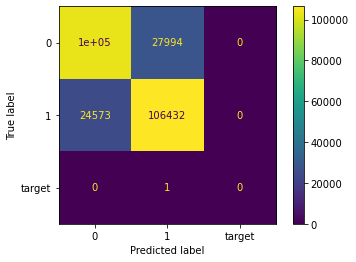

aaaa
bbbbb


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:3

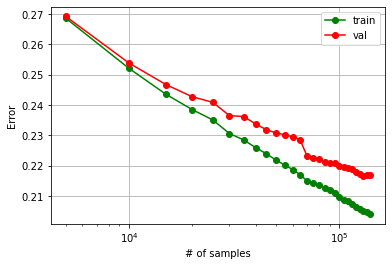

bbbbb


In [17]:
LR()

aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


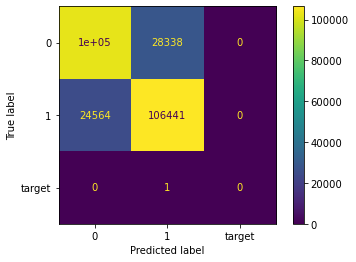

aaaa
bbbbb


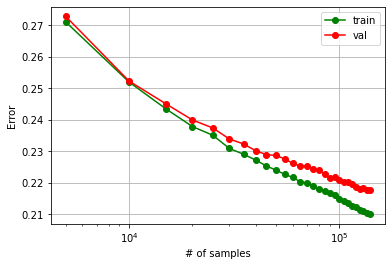

bbbbb


In [18]:
LR_Regularized()

aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


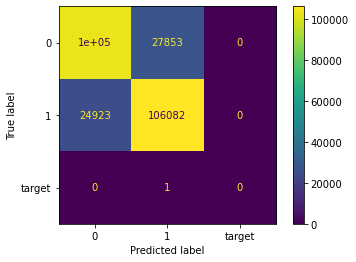

aaaa
bbbbb


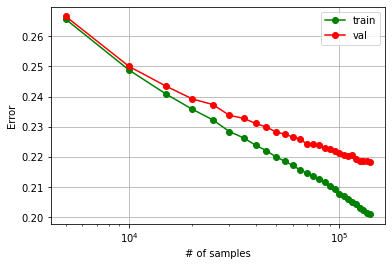

bbbbb


In [19]:
LR_best_hyperparam()

## 3. Decision Tree

In [23]:
# Your code here for DT
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

def DT():
    clf = DecisionTreeClassifier()
    clf.fit(train_feature_set, y_train)
    pred = clf.predict(test_feature_set)
    

    
    print('aaaa')
    df4 = pd.DataFrame(X2_test)
    df4['Prediction'] = pred
    df4 = df4.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df4.to_csv('DT_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, test_feature_set, y_test)  
    plt.show()
    print('aaaa')
    
    print('bbbbb')
    trainscore = []
    valscore = []
    sizearr = []
    size = 1
    count = 0
    while size < len(y_val)+4999:
        size+=5000
        sizearr.append(size)
        count+=1
        clf.fit(train_feature_set[:size], y_train[:size])

        pred1 = clf.predict(train_feature_set)
        pred2 = clf.predict(val_feature_set)
        
        trainscore.append(1-accuracy_score(y_train, pred1))
        valscore.append(1-accuracy_score(y_val, pred2))
    
    

    plt.plot(sizearr, trainscore, 'o-', color='green', label='train')
    plt.plot(sizearr, valscore, 'o-', color='red', label='val')
    plt.legend()
    plt.grid()
    plt.xscale("log")
    plt.xlabel('# of samples')
    plt.ylabel('Error')
    plt.show()
    print('bbbbb')
    
def DT_best_tree_depth():
    clf = DecisionTreeClassifier(max_depth=60)
    clf.fit(train_feature_set, y_train)
    pred = clf.predict(test_feature_set)
    

    
    print('aaaa')
    df5 = pd.DataFrame(X2_test)
    df5['Prediction'] = pred
    df5 = df5.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df5.to_csv('DT_best_tree_depth_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, test_feature_set, y_test)  
    plt.show()
    print('aaaa')
    
    print('bbbbb')
    trainscore = []
    valscore = []
    sizearr = []
    size = 1
    count = 0
    while size < len(y_val)+4999:
        size+=5000
        sizearr.append(size)
        count+=1
        clf.fit(train_feature_set[:size], y_train[:size])

        pred1 = clf.predict(train_feature_set)
        pred2 = clf.predict(val_feature_set)
        
        trainscore.append(1-accuracy_score(y_train, pred1))
        valscore.append(1-accuracy_score(y_val, pred2))
    
    

    plt.plot(sizearr, trainscore, 'o-', color='green', label='train')
    plt.plot(sizearr, valscore, 'o-', color='red', label='val')
    plt.legend()
    plt.grid()
    plt.xscale("log")
    plt.xlabel('# of samples')
    plt.ylabel('Error')
    plt.show()
    print('bbbbb')

aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


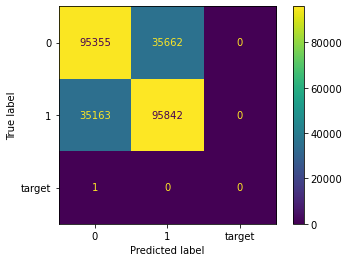

aaaa
bbbbb


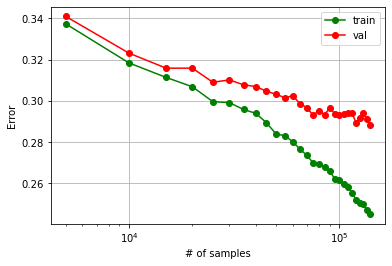

bbbbb


In [24]:
DT()

aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


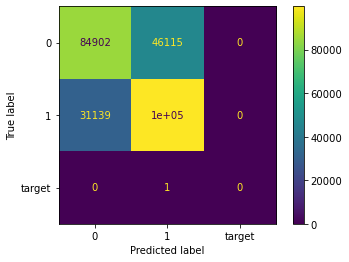

aaaa
bbbbb


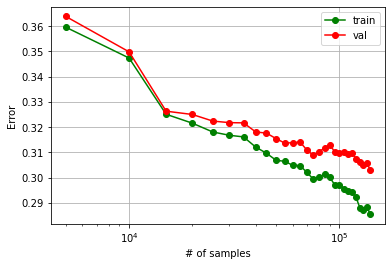

bbbbb


In [25]:
DT_best_tree_depth()

## 4. Random Forests

In [20]:
# Your code here for Random Forest
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

def random_forest():
    clf = RandomForestClassifier(max_depth = 1)
    clf.fit(train_feature_set, y_train)
    pred = clf.predict(test_feature_set)
    
    
    print('aaaa')
    df6 = pd.DataFrame(X2_test)
    df6['Prediction'] = pred
    df6 = df6.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df6.to_csv('random_forest_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, test_feature_set, y_test)  
    plt.show()
    print('aaaa')
    
    print('bbbbb')
    trainscore = []
    valscore = []
    sizearr = []
    size = 1
    count = 0
    while size < len(y_val)+4999:
        size+=5000
        sizearr.append(size)
        count+=1
        clf.fit(train_feature_set[:size], y_train[:size])

        pred1 = clf.predict(train_feature_set)
        pred2 = clf.predict(val_feature_set)
        
        trainscore.append(1-accuracy_score(y_train, pred1))
        valscore.append(1-accuracy_score(y_val, pred2))
    
    

    plt.plot(sizearr, trainscore, 'o-', color='green', label='train')
    plt.plot(sizearr, valscore, 'o-', color='red', label='val')
    plt.legend()
    plt.grid()
    plt.xscale("log")
    plt.xlabel('# of samples')
    plt.ylabel('Error')
    plt.show()
    print('bbbbb')
    

def random_forest_hyperparam_tuning():
    clf = RandomForestClassifier(max_depth=10, random_state=42)
    clf.fit(train_feature_set, y_train)
    pred = clf.predict(test_feature_set)

    
    print('aaaa')
    df7 = pd.DataFrame(X2_test)
    df7['Prediction'] = pred
    df7 = df7.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df7.to_csv('random_forest_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, test_feature_set, y_test)  
    plt.show()
    print('aaaa')
    
    print('bbbbb')
    trainscore = []
    valscore = []
    sizearr = []
    size = 1
    count = 0
    while size < len(y_val)+4999:
        size+=5000
        sizearr.append(size)
        count+=1
        clf.fit(train_feature_set[:size], y_train[:size])

        pred1 = clf.predict(train_feature_set)
        pred2 = clf.predict(val_feature_set)
        
        trainscore.append(1-accuracy_score(y_train, pred1))
        valscore.append(1-accuracy_score(y_val, pred2))
    
    

    plt.plot(sizearr, trainscore, 'o-', color='green', label='train')
    plt.plot(sizearr, valscore, 'o-', color='red', label='val')
    plt.legend()
    plt.grid()
    plt.xscale("log")
    plt.xlabel('# of samples')
    plt.ylabel('Error')
    plt.show()
    print('bbbbb')


    

aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


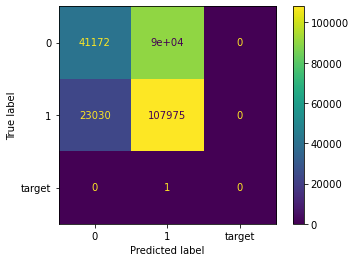

aaaa
bbbbb


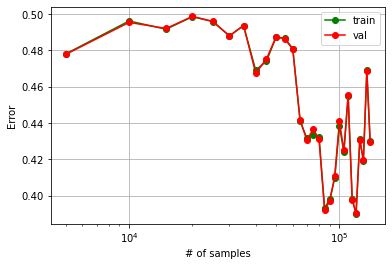

bbbbb


In [21]:
random_forest()

aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


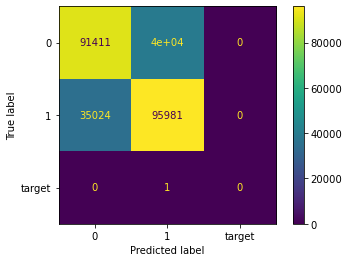

aaaa
bbbbb


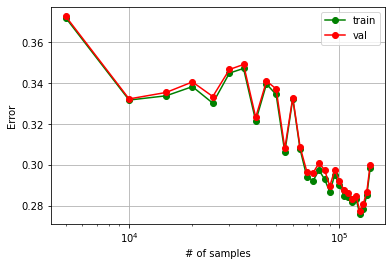

bbbbb


In [22]:
random_forest_hyperparam_tuning()